# Climate Tweets In Response to the Australian Bushfires

Climate Change has long been a hot button issue, but with the recent Australian Bushfires one could argue that the subject has spent more time than previously front in center of social media. However, has this crisis changed the tenor of postings in regard to climate change? Using a previously curated dataset of tweets with the key phrases "Climate Change", "Climate Crisis", or "Global Warming" I seek to answer this question with a sentiment analysis using the Python language.

## EDA

Before we start, it's important to understand the data we have available, and ensure we have the fields necessary to complete the sentiment analysis and understand the results. 

In [1]:
import pandas as pd
from datetime import datetime as dt

We begin by reading the file of tweets and taking a look at what is already there.

In [2]:
original_tweets = pd.read_csv("D:/Practicum1/tweets.csv")

In [3]:
original_tweets.head()

,Unnamed: 0,0,1,2,3
0,0,1079527504325406720,sherianbird,"Yeah right, #DumbassGovBrown Men fought in WWI...",2018-12-30 23:59:48+00:00
1,1,1079527402727006208,Grumpy_Paddy,One bee doesn't make climate change. Bees have...,2018-12-30 23:59:24+00:00
2,2,1079527384397856769,MalphasEternal,Ken also conveniently forgets that there are i...,2018-12-30 23:59:19+00:00
3,3,1079527360012189696,teambernie27001,Climate Change is a crisis requiring immediate...,2018-12-30 23:59:13+00:00
4,4,1079527333357330432,ArchitectsDCA,You know that #capandtrade is the best model f...,2018-12-30 23:59:07+00:00


In [4]:
for col in original_tweets.columns: 
    print(col)

Unnamed: 0
0
1
2
3


None of the columns came in with names, so let's assign them.

In [5]:
tweets=original_tweets.rename(columns={"Unnamed: 0": "row_id", "0": "tweet_id","1":"username", "2":"text","3":"date_time"})
tweets.head()

,row_id,tweet_id,username,text,date_time
0,0,1079527504325406720,sherianbird,"Yeah right, #DumbassGovBrown Men fought in WWI...",2018-12-30 23:59:48+00:00
1,1,1079527402727006208,Grumpy_Paddy,One bee doesn't make climate change. Bees have...,2018-12-30 23:59:24+00:00
2,2,1079527384397856769,MalphasEternal,Ken also conveniently forgets that there are i...,2018-12-30 23:59:19+00:00
3,3,1079527360012189696,teambernie27001,Climate Change is a crisis requiring immediate...,2018-12-30 23:59:13+00:00
4,4,1079527333357330432,ArchitectsDCA,You know that #capandtrade is the best model f...,2018-12-30 23:59:07+00:00


The wrong datatype can keep code from working, so let's check that... and change date_time to an actual datetime format!

In [6]:
tweets.dtypes

row_id        int64
tweet_id      int64
username     object
text         object
date_time    object
dtype: object

In [7]:
tweets['date_time']=pd.to_datetime(tweets['date_time'])
tweets.dtypes

row_id                     int64
tweet_id                   int64
username                  object
text                      object
date_time    datetime64[ns, UTC]
dtype: object

In [8]:
tweets.head()

,row_id,tweet_id,username,text,date_time
0,0,1079527504325406720,sherianbird,"Yeah right, #DumbassGovBrown Men fought in WWI...",2018-12-30 23:59:48+00:00
1,1,1079527402727006208,Grumpy_Paddy,One bee doesn't make climate change. Bees have...,2018-12-30 23:59:24+00:00
2,2,1079527384397856769,MalphasEternal,Ken also conveniently forgets that there are i...,2018-12-30 23:59:19+00:00
3,3,1079527360012189696,teambernie27001,Climate Change is a crisis requiring immediate...,2018-12-30 23:59:13+00:00
4,4,1079527333357330432,ArchitectsDCA,You know that #capandtrade is the best model f...,2018-12-30 23:59:07+00:00


With the Pandas Dataframe, the index already gives us a row_id, so let's drop that and create a new copy of the table for our next steps. 

In [9]:
tweets2=tweets.drop(columns=['row_id'])
tweets2.head()

,tweet_id,username,text,date_time
0,1079527504325406720,sherianbird,"Yeah right, #DumbassGovBrown Men fought in WWI...",2018-12-30 23:59:48+00:00
1,1079527402727006208,Grumpy_Paddy,One bee doesn't make climate change. Bees have...,2018-12-30 23:59:24+00:00
2,1079527384397856769,MalphasEternal,Ken also conveniently forgets that there are i...,2018-12-30 23:59:19+00:00
3,1079527360012189696,teambernie27001,Climate Change is a crisis requiring immediate...,2018-12-30 23:59:13+00:00
4,1079527333357330432,ArchitectsDCA,You know that #capandtrade is the best model f...,2018-12-30 23:59:07+00:00


Just how many tweets are we working with here? And are there any duplicates? Since there are, we will drop so as not to conflate any sentiment scores for a group later on.

In [10]:
tweets2['tweet_id'].count()

10902

In [11]:
tweets2['tweet_id'].nunique()

10877

In [12]:
tweets2.drop_duplicates(subset='tweet_id',keep='first',inplace=True)

In [13]:
tweets2['tweet_id'].count()

10877

In [14]:
tweets2['tweet_id'].nunique()

10877

Not unexpectedly, some users tweets multiple times in our dataset. There is nothing wrong that, but it is good to know!

In [15]:
tweets2['username'].nunique()

9529

Dates play an important part in the groups we want to define, so let's see how that looks in our data, and create some new fields to help us analyse by dates.

In [16]:
tweets2['month']=tweets2['date_time'].dt.month

In [17]:
tweets2.groupby('month')['tweet_id'].count()

month
1     1036
2      818
3      914
4      886
5      912
6      874
7      896
8      898
9      880
10     903
11     888
12     972
Name: tweet_id, dtype: int64

January is unexpectedly high given that there should be a roughly equal number of tweets for each day of 2019. Why is that?

In [18]:
tweets2['day']=tweets2['date_time'].dt.day

In [19]:
tweets2[tweets2['month']==1].groupby('day')['tweet_id'].count()

day
1     60
2     59
3     58
4     59
5     30
6     30
7     30
8     29
9     29
10    30
11    30
12    30
13    29
14    29
15    30
16    30
17    29
18    30
19    29
20    30
21    29
22    30
23    30
24    30
25    30
26    29
27    30
28    28
29    30
30    30
31    30
Name: tweet_id, dtype: int64

Picking a day and just taking a look at the data reveals that some 2020 data snuck in from our original data pull off Twitter. Since these aren't a part of our defined time period, we will create a new dataset that is truly only 2019.

In [20]:
tweets2[(tweets2['day']==1) & (tweets2['month']==1)]

,tweet_id,username,text,date_time,month,day
20,1080252273236664320,LaurenBolton3,That human beings make a significant impact on...,2019-01-01 23:59:46+00:00,1,1
21,1080252264915316743,jeffwhelpley,"In the short term, no doubt that Trump and the...",2019-01-01 23:59:44+00:00,1,1
22,1080252242068951041,NathanWurtzel,"OK, well judging by your response to 9/11, we'...",2019-01-01 23:59:39+00:00,1,1
23,1080252227632021504,GovtsTheProblem,Not as generous as taxpayers. Over $13 billion...,2019-01-01 23:59:35+00:00,1,1
24,1080252208803766272,iamlordyaya,Is Dave Rubin indirectly denying man-made clim...,2019-01-01 23:59:31+00:00,1,1
25,1080252208439091201,climatedynamics,Cleaning up steel is key to tackling climate c...,2019-01-01 23:59:31+00:00,1,1
26,1080252183831080963,duckman11791,If you deny climate change exists. You essenti...,2019-01-01 23:59:25+00:00,1,1
27,1080252167334887424,ryanmrichardson,I think they're attributing more left-wing ide...,2019-01-01 23:59:21+00:00,1,1
28,1080252147516743680,ExNinja95,Climate change is a Marxist hoax.,2019-01-01 23:59:16+00:00,1,1
29,1080252130252906497,Yvonne4NE,Reports released last week indicate that the L...,2019-01-01 23:59:12+00:00,1,1


In [21]:
tweets2['year']=tweets2['date_time'].dt.year

In [22]:
tweets3=tweets2[tweets2['year']==2019]

In [23]:
tweets3.groupby('month')['tweet_id'].count()

month
1     918
2     818
3     914
4     886
5     912
6     874
7     896
8     898
9     880
10    903
11    888
12    912
Name: tweet_id, dtype: int64

Now we can start creating our groups. First by keywords, with and without spaces to account for any hashtags with the key phrases.

In [24]:
tweets3['change']=tweets3['text'].str.contains('climate change|climatechange')

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
tweets3['crisis']=tweets3['text'].str.contains('climate crisis|climatecrisis')

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
tweets3['gw']=tweets3['text'].str.contains('global warming|globalwarming')

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
tweets3.groupby('change')['tweet_id'].count()

change
False    7659
True     3035
Name: tweet_id, dtype: int64

In [28]:
tweets3.groupby('crisis')['tweet_id'].count()

crisis
False    8721
True     1973
Name: tweet_id, dtype: int64

In [29]:
tweets3.groupby('gw')['tweet_id'].count()

gw
False    8228
True     2466
Name: tweet_id, dtype: int64

Groups by data are important as well. With these we can see how key events through out the Australian Bushfire crisis, gathered from a variety of news sources, might have changed the tenor of tweets. 

In [30]:
tweets3['date']=tweets3['date_time'].dt.strftime("%x")

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
#Hadden (2020)
tweets3.loc[(tweets3['date'] <  '06/26/19'), 'date_group']='pre-season'  #before the 2019 bushfire season started
tweets3.loc[(tweets3['date'] < '10/01/19') & (tweets3['date'] >= '06/26/19'), 'date_group'] = 'na_only' #offical start of N. Aus. province bushfire season
tweets3.loc[(tweets3['date'] < '11/11/19') & (tweets3['date'] >= '10/01/19'), 'date_group'] = 'national_season' #official start of bushfire season national
tweets3.loc[(tweets3['date'] < '12/18/19') & (tweets3['date'] >= '11/11/19'), 'date_group'] = 'SOE_start' #Start of declared national state of emergency
tweets3.loc[(tweets3['date'] >= '12/18/19'), 'date_group'] = 'rly_hot' #Hottest day of the year

C:\Users\jelin\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jelin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
tweets3.groupby('date_group')['tweet_id'].count()

date_group
SOE_start          1089
na_only            2821
national_season    1199
pre-season         5175
rly_hot             415
Name: tweet_id, dtype: int64

In [33]:
tweets3.head()

,tweet_id,username,text,date_time,month,day,year,change,crisis,gw,date,date_group
20,1080252273236664320,LaurenBolton3,That human beings make a significant impact on...,2019-01-01 23:59:46+00:00,1,1,2019,True,False,False,01/01/19,pre-season
21,1080252264915316743,jeffwhelpley,"In the short term, no doubt that Trump and the...",2019-01-01 23:59:44+00:00,1,1,2019,True,False,False,01/01/19,pre-season
22,1080252242068951041,NathanWurtzel,"OK, well judging by your response to 9/11, we'...",2019-01-01 23:59:39+00:00,1,1,2019,True,False,False,01/01/19,pre-season
23,1080252227632021504,GovtsTheProblem,Not as generous as taxpayers. Over $13 billion...,2019-01-01 23:59:35+00:00,1,1,2019,True,False,False,01/01/19,pre-season
24,1080252208803766272,iamlordyaya,Is Dave Rubin indirectly denying man-made clim...,2019-01-01 23:59:31+00:00,1,1,2019,True,False,False,01/01/19,pre-season


## Sentiment Analysis Preparation

For the actual sentiment analysis, our tweet text needs to be cleaned up a bit to pull out unecessary characters. 

In [34]:
tweets3['text'].head()

20    That human beings make a significant impact on...
21    In the short term, no doubt that Trump and the...
22    OK, well judging by your response to 9/11, we'...
23    Not as generous as taxpayers. Over $13 billion...
24    Is Dave Rubin indirectly denying man-made clim...
Name: text, dtype: object

In [35]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jelin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Create the actual cleaning function with below commands:

In [36]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+' #pulls out tags which should all be considered proper nouns/names
pat2 = r'https?://[A-Za-z0-9./]+'#really just pulls out first part of web address, but ok cause lets us keep linked article titles
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml') #convert some accidental xml into readable characters
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped) #pull out tags and webaddresses
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?") #clean up some utf-8 that snuck in
    except:
        clean = stripped
    
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(clean)
    return (" ".join(words)).strip()

#Kim (2018)

Create clean version of tweets with below loop and then append to the existing dataframe:

In [37]:
text=[]
for t in tweets3['text']:
    text.append(tweet_cleaner(str(t)))

In [38]:
tweets3['clean_text']=text

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
tweets3.head()

,tweet_id,username,text,date_time,month,day,year,change,crisis,gw,date,date_group,clean_text
20,1080252273236664320,LaurenBolton3,That human beings make a significant impact on...,2019-01-01 23:59:46+00:00,1,1,2019,True,False,False,01/01/19,pre-season,That human beings make a significant impact on...
21,1080252264915316743,jeffwhelpley,"In the short term, no doubt that Trump and the...",2019-01-01 23:59:44+00:00,1,1,2019,True,False,False,01/01/19,pre-season,"In the short term , no doubt that Trump and th..."
22,1080252242068951041,NathanWurtzel,"OK, well judging by your response to 9/11, we'...",2019-01-01 23:59:39+00:00,1,1,2019,True,False,False,01/01/19,pre-season,"OK , well judging by your response to 9 / 11 ,..."
23,1080252227632021504,GovtsTheProblem,Not as generous as taxpayers. Over $13 billion...,2019-01-01 23:59:35+00:00,1,1,2019,True,False,False,01/01/19,pre-season,Not as generous as taxpayers . Over $ 13 billi...
24,1080252208803766272,iamlordyaya,Is Dave Rubin indirectly denying man-made clim...,2019-01-01 23:59:31+00:00,1,1,2019,True,False,False,01/01/19,pre-season,Is Dave Rubin indirectly denying man - made cl...


To end our EDA and sentiment prep, let's save a copy of the current dataframe for reference.

In [40]:
tweets3.to_csv('D:/Practicum1/tweets3.csv')

## Run Sentiment Analysis

Now that EDA and cleansing is complete, let's get some sentiment scores! We will use the NLTK Vader package, which is specifically designed for sentiment analysis of social media, and actually takes into account the way capitalization, punctuation, and emojis are used with language to provide a more accurate score of the overall sentiment than traditional sentiment analysis (Pandey, 2018). While many other sentiment analysis packages require tokenization of the text, cleaning of cases, converting to root words, and so on, this nifty little package does a lot of that for you!

A simple loop is all it takes to get sentiment scores that include the overall score, and broken out scores for positivity, negativity, and neutrality. 

In [41]:
sid = SentimentIntensityAnalyzer()

sentiment=pd.DataFrame(columns=[])


for t in tweets3['clean_text']: 
    ss=sid.polarity_scores(t)
    sentiment=sentiment.append(ss,ignore_index=True)
    
#Goodger (2013), Hutto (2020), and Pandey (2018)

In [42]:
sentiment

,compound,neg,neu,pos
0,-0.0171,0.112,0.780,0.108
1,-0.6310,0.186,0.814,0.000
2,0.3962,0.122,0.690,0.188
3,0.1872,0.112,0.805,0.083
4,-0.3400,0.231,0.769,0.000
...,...,...,...,...
10694,0.2500,0.122,0.640,0.238
10695,-0.4019,0.110,0.836,0.054
10696,0.5859,0.000,0.798,0.202
10697,-0.5118,0.245,0.553,0.202


In [43]:
tweets3['compound']=sentiment['compound']
tweets3['neg']=sentiment['neg']
tweets3['neu']=sentiment['neu']
tweets3['pos']=sentiment['pos']

C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jelin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Here's our final table of data including group definitions and sentiment scores!

In [44]:
tweets3.head()

,tweet_id,username,text,date_time,month,day,year,change,crisis,gw,date,date_group,clean_text,compound,neg,neu,pos
20,1080252273236664320,LaurenBolton3,That human beings make a significant impact on...,2019-01-01 23:59:46+00:00,1,1,2019,True,False,False,01/01/19,pre-season,That human beings make a significant impact on...,0.4854,0.000,0.875,0.125
21,1080252264915316743,jeffwhelpley,"In the short term, no doubt that Trump and the...",2019-01-01 23:59:44+00:00,1,1,2019,True,False,False,01/01/19,pre-season,"In the short term , no doubt that Trump and th...",-0.1531,0.132,0.760,0.108
22,1080252242068951041,NathanWurtzel,"OK, well judging by your response to 9/11, we'...",2019-01-01 23:59:39+00:00,1,1,2019,True,False,False,01/01/19,pre-season,"OK , well judging by your response to 9 / 11 ,...",0.2960,0.000,0.909,0.091
23,1080252227632021504,GovtsTheProblem,Not as generous as taxpayers. Over $13 billion...,2019-01-01 23:59:35+00:00,1,1,2019,True,False,False,01/01/19,pre-season,Not as generous as taxpayers . Over $ 13 billi...,0.0000,0.000,1.000,0.000
24,1080252208803766272,iamlordyaya,Is Dave Rubin indirectly denying man-made clim...,2019-01-01 23:59:31+00:00,1,1,2019,True,False,False,01/01/19,pre-season,Is Dave Rubin indirectly denying man - made cl...,-0.2960,0.099,0.901,0.000


In [45]:
tweets3.to_csv('D:/Practicum1/tweets3SA.csv')

## Compare the scores by groups

In [103]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import boxcox 
import numpy

### Complete Dataset

Unfortunately as we can clearly see by the histogram, the data is not normalized as a whole. 

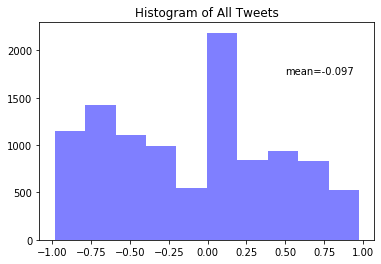

In [91]:
mn=round(numpy.mean(tweets3['compound']),3)

plt.hist(tweets3['compound'], 10, facecolor='blue', alpha=0.5)
plt.title('Histogram of All Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,1750))
plt.show()

### Group Histograms to Check for Normal Distribution

Since we want to compare the datasets by group, we need to check if those have a normal distribution too. While a couple are close, most are not, and the data we use does not lend its self to a power transformation with the negative values.

First we need to create the separate datasets. For the key phrases:

In [48]:
change=tweets3[tweets3['change']==True]
crisis=tweets3[tweets3['crisis']==True]
gw=tweets3[tweets3['gw']==True]

And for the date groups:

In [49]:
pre=tweets3[tweets3['date_group']=='pre-season']
na_only=tweets3[tweets3['date_group']=='na_only']
national=tweets3[tweets3['date_group']=='national_season']
SOE=tweets3[tweets3['date_group']=='SOE_start']
hot=tweets3[tweets3['date_group']=='rly_hot']

Our Key Phrase distributions:

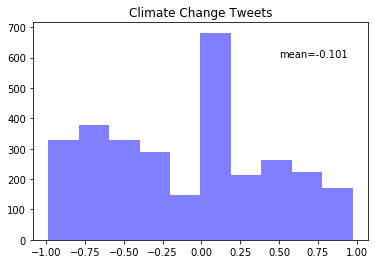

In [102]:
mn=round(numpy.mean(change['compound']),3)

plt.hist(change['compound'], 10, facecolor='blue', alpha=0.5)
plt.title('Climate Change Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,600))
plt.show()

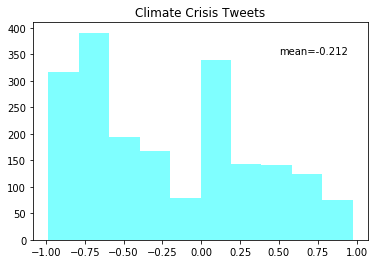

In [90]:
mn=round(numpy.mean(crisis['compound']),3)

plt.hist(crisis['compound'], 10, facecolor='cyan', alpha=0.5)
plt.title('Climate Crisis Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,350))
plt.show()

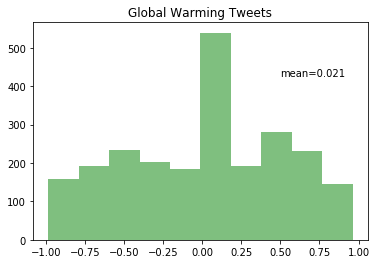

In [70]:
mn=round(numpy.mean(gw['compound']),3)

plt.hist(gw['compound'], 10, facecolor='green', alpha=0.5)
plt.title('Global Warming Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,425))
plt.show()

Note this is the only group defined in this analysis that has a positive mean sentiment score. 

Our Date Group Distributions:

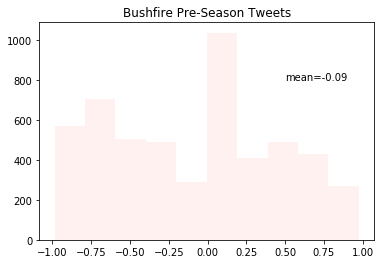

In [76]:
mn=round(numpy.mean(pre['compound']),3)

plt.hist(pre['compound'], 10, facecolor='mistyrose', alpha=0.5)
plt.title('Bushfire Pre-Season Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,800))
plt.show()

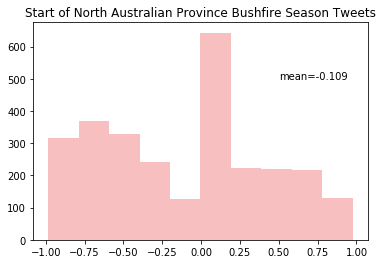

In [78]:
mn=round(numpy.mean(na_only['compound']),3)

plt.hist(na_only['compound'], 10, facecolor='lightcoral', alpha=0.5)
plt.title('Start of North Australian Province Bushfire Season Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,500))
plt.show()

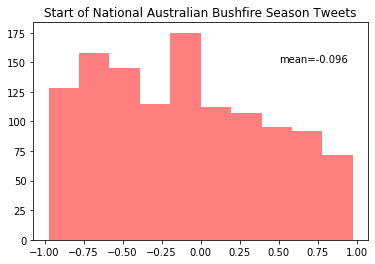

In [82]:
mn=round(numpy.mean(national['compound']),3)

plt.hist(national['compound'], 10, facecolor='red', alpha=0.5)
plt.title('Start of National Australian Bushfire Season Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,150))
plt.show()

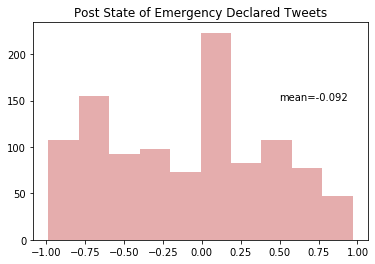

In [88]:
mn=round(numpy.mean(SOE['compound']),3)

plt.hist(SOE['compound'], 10, facecolor='indianred', alpha=0.5)
plt.title('Post State of Emergency Declared Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,150))
plt.show()

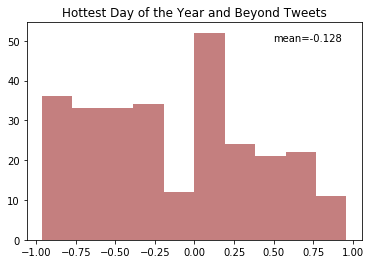

In [117]:
mn=round(numpy.mean(hot['compound']),3)

plt.hist(hot['compound'], 10, facecolor='darkred', alpha=0.5)
plt.title('Hottest Day of the Year and Beyond Tweets')
plt.annotate('mean='+ str(mn), xy=(.5,50))
plt.show()

## Testing for Significant Differences

Since this data is not normally distributed, we will need to use a non-parametric statistical significance test. Since the data is not paired, we will use the Mann-Whitney U test (Brownlee, 2018). 

In [92]:
from scipy.stats import mannwhitneyu

Our key phrase groups, despite all referring to the same thing, are all significantly different from each other in sentiment. 

In [98]:
#Brownlee (2018)
stat, p = mannwhitneyu(change['compound'], crisis['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2623609.000, p=0.0000000000
Different distribution (reject H0)


In [99]:
stat, p = mannwhitneyu(change['compound'], gw['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=3066550.000, p=0.0000000000
Different distribution (reject H0)


In [100]:
stat, p = mannwhitneyu(crisis['compound'], gw['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1722320.500, p=0.0000000000
Different distribution (reject H0)


Not all date groups are alike, but some are!

In [107]:
stat, p = mannwhitneyu(pre['compound'], na_only['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=7157167.000, p=0.0745772695
Same distribution (fail to reject H0)


In [108]:
stat, p = mannwhitneyu(pre['compound'], national['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=3086063.500, p=0.3878471668
Same distribution (fail to reject H0)


In [109]:
stat, p = mannwhitneyu(pre['compound'], SOE['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2752720.000, p=0.1150001282
Same distribution (fail to reject H0)


In [110]:
stat, p = mannwhitneyu(pre['compound'], hot['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=748302.000, p=0.0000000000
Different distribution (reject H0)


In [111]:
stat, p = mannwhitneyu(na_only['compound'], national['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1667180.500, p=0.2376776413
Same distribution (fail to reject H0)


In [112]:
stat, p = mannwhitneyu(na_only['compound'], SOE['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=1470964.000, p=0.0197773021
Different distribution (reject H0)


In [113]:
stat, p = mannwhitneyu(na_only['compound'], hot['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=400276.000, p=0.0000000000
Different distribution (reject H0)


In [114]:
stat, p = mannwhitneyu(national['compound'], SOE['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=634160.500, p=0.1179500545
Same distribution (fail to reject H0)


In [115]:
stat, p = mannwhitneyu(national['compound'], hot['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=172230.000, p=0.0000000000
Different distribution (reject H0)


In [116]:
stat, p = mannwhitneyu(SOE['compound'], hot['compound'])
print('Statistics=%.3f, p=%.10f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=163374.500, p=0.0000000000
Different distribution (reject H0)


#### A Summary Image of Date Group Comparisons

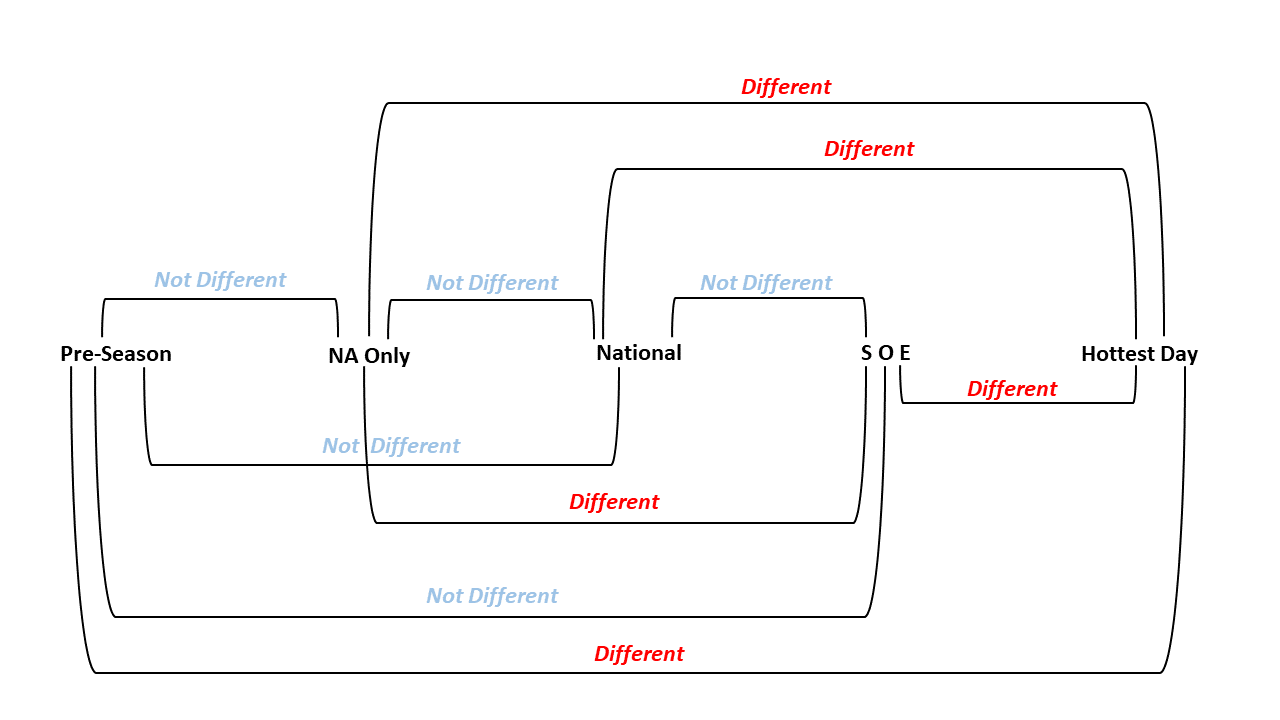

In [119]:
from IPython.display import Image
Image("Differences.png")